## Plot Results of Solving Ising Model using Density Matrix Renormalizaton Group

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess

In [2]:
def mean_field_energy_density(lmbda):
    if np.abs(lmbda) <= 2:
        return -1 - lmbda ** 2 / 4
    return -np.abs(lmbda)

In [3]:
compiled_dir = f"..{os.sep}compiled"
plot_dir = f"..{os.sep}plots"

In [4]:
program = f"{compiled_dir}{os.sep}dmrg_ising"

In [5]:
N = list(range(2, 3))

In [6]:
lam = np.arange(-5, 5.1, 0.1)

In [7]:
gs_energy = np.zeros((len(N), len(lam)))
gs_energy[:] = np.nan

In [8]:
max_iterations = np.zeros((len(N), len(lam)))
max_iterations[:] = np.nan

In [9]:
for i in range(len(N)):
    print(f"Running N = {N[i]} ...")

    for j in range(len(lam)):
        output = subprocess.run(
            [program, "--N", str(N[i]), "--lambda", str(lam[j]), "--max_iter", str(1500), "--thres", str(0.000001)],
            stdout=subprocess.PIPE,
            encoding="ascii"
        )

        results = output.stdout.split("\n")

        did_converge = results[7].split("=")[1].strip()

        if did_converge == "T":
            gs_energy[i, j] = float(results[5].split("=")[1])
            max_iterations[i, j] = int(results[6].split("=")[1])

Running N = 2 ...


In [20]:
max_iterations[0]

array([1121., 1070., 1002.,  951.,  898.,  857.,  815.,  773.,  731.,
        691.,  430.,  611.,  573.,  536.,  502.,  617.,  601.,  648.,
        554.,  534.,  500.,  445.,  452.,  264.,  242.,  216.,  200.,
        517.,  152.,  140.,  406.,  390.,  327.,  216.,  267.,  363.,
        349.,  105.,  301.,  190.,   71.,  280.,  220.,  238.,  302.,
        182.,  485.,  178.,  335.,  288.,  154.,  436.,  689.,  379.,
        320.,  483.,  265.,  136.,  273.,  210.,  464.,  144.,   98.,
        179.,  213.,  353.,  262.,  217.,  230.,  253.,  139.,  297.,
        306.,  180.,  197.,  223.,  241.,  371.,  467.,  446.,  528.,
        484.,  511.,  575.,  573.,  605.,  641.,  667.,  722.,  612.,
        651.,  690.,  731.,  773.,  815.,  857.,  592.,  945.,  660.,
       1057., 1095.])

In [25]:
max_iterations[0].mean()

460.84158415841586

In [11]:
gs_energy[0]

array([-5.0646, -4.966 , -4.8675, -4.769 , -4.6705, -4.5722, -4.4739,
       -4.3756, -4.2775, -4.1795, -4.0834, -3.9838, -3.8861, -3.7886,
       -3.6912, -3.5927, -3.4952, -3.3977, -3.3012, -3.2045, -3.1081,
       -3.0124, -2.916 , -2.8236, -2.7287, -2.6344, -2.5403, -2.4408,
       -2.3549, -2.2627, -2.1633, -2.0723, -1.9829, -1.8957, -1.8075,
       -1.7212, -1.6383, -1.5627, -1.4808, -1.4088, -1.3447, -1.2757,
       -1.2193, -1.1687, -1.1248, -1.0883, -1.0572, -1.0336, -1.015 ,
       -1.004 , -1.0004, -1.0042, -1.0151, -1.0329, -1.0573, -1.0876,
       -1.1251, -1.1698, -1.2189, -1.2765, -1.3382, -1.41  , -1.4856,
       -1.5598, -1.6398, -1.7214, -1.8076, -1.8959, -1.9841, -2.0739,
       -2.1706, -2.2565, -2.3492, -2.447 , -2.5404, -2.6342, -2.7287,
       -2.8214, -2.916 , -3.0122, -3.1079, -3.2052, -3.3017, -3.3982,
       -3.4956, -3.5928, -3.6902, -3.7877, -3.8852, -3.9838, -4.0816,
       -4.1795, -4.2775, -4.3756, -4.4739, -4.5722, -4.6721, -4.769 ,
       -4.8689, -4.9

In [12]:
mf_gs_energy = [mean_field_energy_density(l) for l in lam]

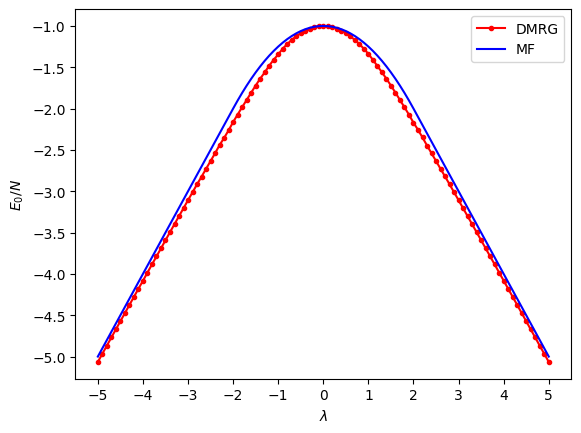

In [13]:
plt.plot(lam, gs_energy[0], "r.-", label="DMRG")
plt.plot(lam, mf_gs_energy, "b-", label="MF")
plt.xlabel("$\lambda$")
plt.ylabel("$E_0/N$")
plt.xticks(np.arange(-5, 6, 1))
plt.legend();

Compare with RSRG.

In [14]:
program_rsrg = f"{compiled_dir}{os.sep}rsrg_ising"

In [15]:
gs_energy_rsrg = np.zeros((len(lam)))

In [16]:
N = 2

In [17]:
for i in range(len(lam)):
    output = subprocess.run(
        [program_rsrg, "--N", str(N), "--lambda", str(lam[i])],
        stdout=subprocess.PIPE,
        encoding="ascii"
    )

    results = output.stdout.split("\n")

    did_converge = results[8].split("=")[1].strip()

    if did_converge == "T":
        gs_energy_rsrg[i] = float(results[6].split("=")[1])

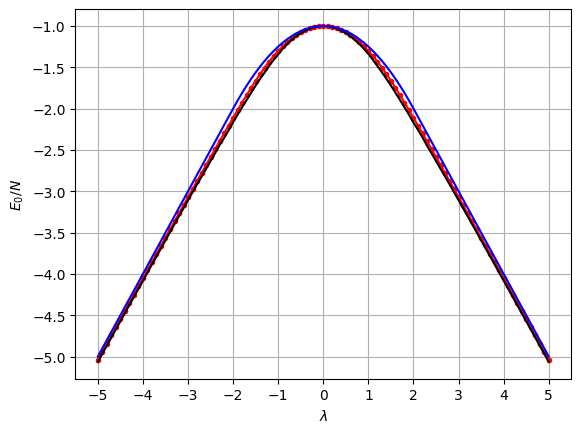

In [18]:
plt.plot(lam, gs_energy_rsrg, "r.-", label="RSRG")
plt.plot(lam, gs_energy[0], "k-", label="DMRG")
plt.plot(lam, mf_gs_energy, "b-", label="MF")
plt.xlabel("$\lambda$")
plt.ylabel("$E_0/N$")
plt.xticks(np.arange(-5, 6, 1))
plt.grid()
# plt.legend()
plt.savefig(f"{plot_dir}{os.sep}energy_vs_lambda_dmrg.pdf", format="pdf", bbox_inches="tight")

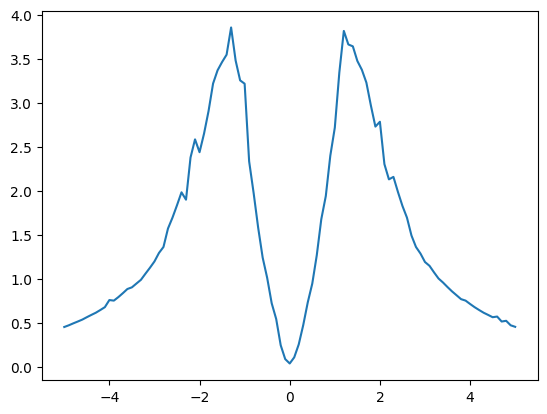

In [19]:
plt.plot(lam, np.abs(100 * (gs_energy[0] - gs_energy_rsrg) / gs_energy_rsrg));